In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from tensorflow.keras import regularizers


In [11]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
train_data.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,70,9,گُل
1,m_17,p_16,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,55,4,مهار توسط دروازه بان
2,m_111,p_88,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,86,31,مهار توسط دروازه بان
3,m_142,p_87,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,77,2,موقعیت از دست رفته
4,m_117,p_9,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,76,46,گُل


In [12]:
train_data.drop(['matchId', 'playerId', 'second'],axis=1,inplace=True)
test_data.drop([ 'second'],axis=1,inplace=True)

## replace missing values

In [13]:
def imputer(data):
    imp_mean = SimpleImputer(missing_values=float('nan'), strategy="most_frequent")
    imp_mean.fit(data)
    imputed_data=pd.DataFrame(imp_mean.transform(data))
    imputed_data.columns=data.columns
    imputed_data.index=data.index
    return imputed_data

train_data=imputer(train_data)
test_data=imputer(test_data)

## add new fetuers

In [14]:
def add_distance(data):
    X=np.array(data.x).astype(float)
    y=np.array(data.y).astype(float)
    distance=np.round(np.sqrt((X**2+y**2)))
    return distance

train_data['distance']=add_distance(train_data)
test_data['distance']=add_distance(test_data)

In [15]:
goal_line_width = 7.32

def add_anlge(data):
    X=np.array(data.x).astype(float)
    y=np.array(data.y).astype(float)
    angle=np.arctan(goal_line_width*X/(X**2+y**2-(goal_line_width/2)**2))
    to_degree=np.vectorize(lambda alpha: np.pi + alpha if alpha < 0 else alpha)

    angle=np.rad2deg(to_degree(angle))
    return angle
train_data['angle']=add_anlge(train_data)
test_data['angle']=add_anlge(test_data)
    
    

In [16]:
train_data.outcome.unique()

array(['گُل', 'مهار توسط دروازه بان', 'موقعیت از دست رفته',
       'برخورد به دفاع', 'برخورد به تیردروازه', 'گُل به خودی'],
      dtype=object)

In [17]:
train_data.interferenceOnShooter.unique()

array(['متوسط', 'کم', 'زیاد'], dtype=object)

In [18]:
train_data['outcome']=  (train_data.outcome=='گُل')  |(train_data.outcome=='گُل به خودی')
train_data['outcome']=train_data['outcome'].astype(float)

In [19]:

for col in ['interferenceOnShooter','playType' ,'bodyPart']:
    enc=preprocessing.LabelEncoder()

    train_data[col]=enc.fit_transform(np.array(train_data[col]).reshape(-1, 1))
    test_data[col]=enc.transform(np.array(test_data[col]).reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [20]:
train_data.head()

,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,outcome,distance,angle
0,0,2,13.47,-11.22,1,0,1,70,1.0,18.0,18.544088
1,0,3,9.48,14.22,3,0,1,55,0.0,17.0,13.982592
2,1,3,29.43,-1.25,6,2,2,86,0.0,29.0,14.153255
3,0,2,26.93,1,4,1,1,77,0.0,27.0,15.458384
4,0,2,10.72,5.24,2,0,1,76,1.0,12.0,31.315918


In [21]:
X=train_data.drop(labels='outcome',axis=1)
y=pd.DataFrame()
y['outcome']=train_data['outcome']

In [22]:
scaler = preprocessing.MinMaxScaler().fit(X)
X=pd.DataFrame(scaler.transform(X))
test_data=pd.DataFrame(scaler.transform(test_data))

In [23]:
X_train, X_val,  y_train, y_val = train_test_split( X, y, test_size=0.1, random_state=42)

In [24]:
test_data.shape[0]==pd.read_csv('test.csv').shape[0]


True

In [57]:
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score


In [26]:
kf = KFold(n_splits=12, random_state=42, shuffle=True)
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)


In [27]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=3,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=5,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [28]:
scores = {}

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] baggi

In [29]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

[06:23:31] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[06:23:38] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[06:23:44] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[06:23:50] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[06:23:57] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:03] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:09] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:15] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:22] WARNING: ../src/objective/regression_

In [30]:
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

SVR: 0.3466 (0.0121)


In [31]:
score = cv_rmse(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())


ridge: 0.2988 (0.0102)


In [34]:
score = cv_rmse(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 

rf: 0.3007 (0.0107)


In [35]:
score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

gbr: 0.3070 (0.0133)


## Fit the models

In [53]:
print('stack_gen')
stack_gen_model = stack_gen.fit(X_train,y_train)



stack_gen
[07:03:32] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[07:03:37] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[07:03:42] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[07:03:47] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[07:03:52] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction

KeyboardInterrupt: 

In [37]:
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X_train,y_train)

lightgbm


In [59]:
print('xgboost')
xgb_model_full_data = xgboost.fit(X_train,y_train)



xgboost
[07:10:39] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [54]:
print('Svr')
svr_model_full_data = svr.fit(X_train,y_train)



Svr


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [40]:


print('Ridge')
ridge_model_full_data = ridge.fit(X_train,y_train)



Ridge


In [61]:
print('RandomForest')
rf_model_full_data = rf.fit(X_train,y_train)



RandomForest


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [62]:
print('GradientBoosting')
gbr_model_full_data = gbr.fit(X_train,y_train)


GradientBoosting


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [51]:
# def blended_predictions(X):
#     return ((0.1 * ridge_model_full_data.predict(X)) + \
#             (0.2 * svr_model_full_data.predict(X)) + \
#             (0.1 * gbr_model_full_data.predict(X)) + \
#             (0.1 * xgb_model_full_data.predict(X)) + \
#             (0.1 * lgb_model_full_data.predict(X)) + \
#             (0.05 * rf_model_full_data.predict(X)) + \
#             (0.35 * stack_gen_model.predict(np.array(X))))

In [52]:
# blended_score = rmsle(y, blended_predictions(X))
# scores['blended'] = (blended_score, 0)
# print('RMSLE score on train data:')
# print(blended_score)


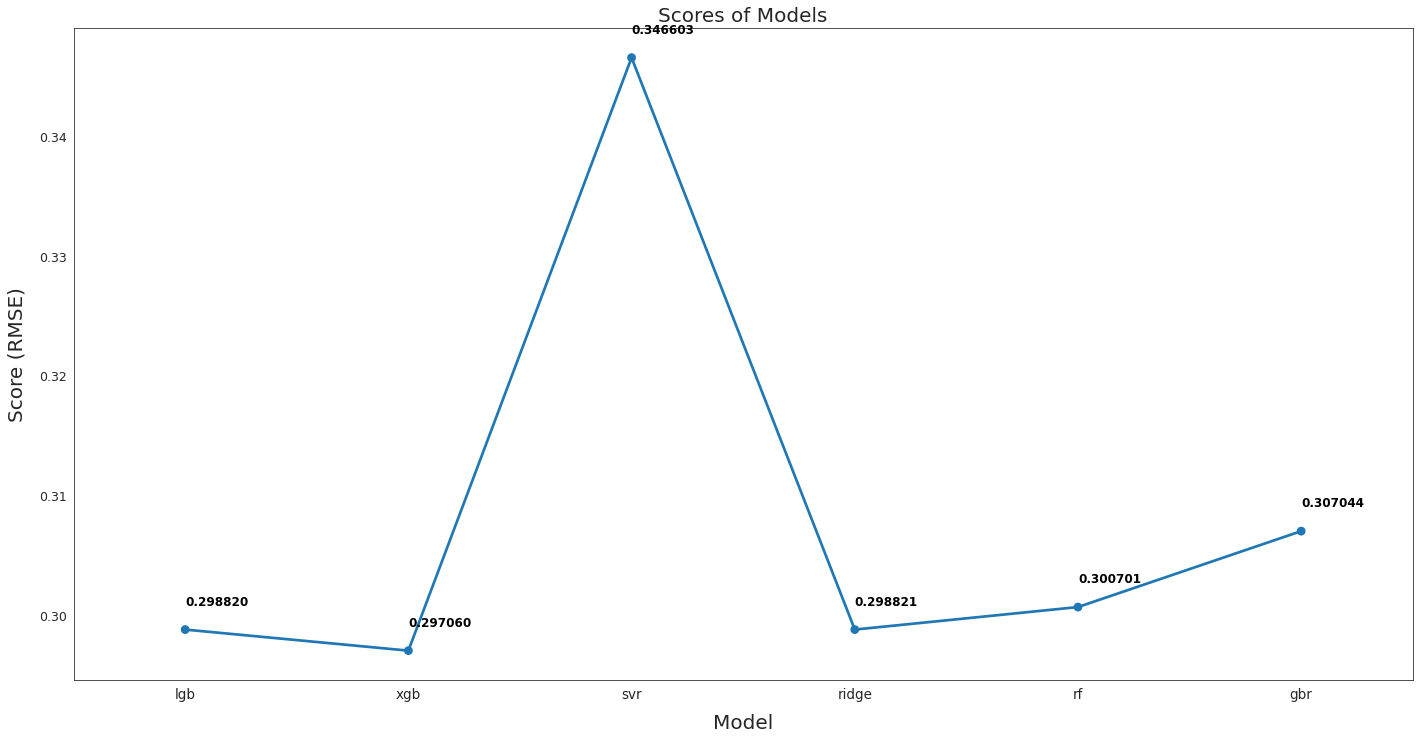

In [48]:
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

### best model :XGB

In [60]:
y_pred=xgboost.predict(X_val)
roc_auc_score(y_val, y_pred)

0.7987748575546697